In [1]:
#Transferencia de Aprendizaje / Transfer Learning

In [2]:
#Crear nuestro propio conjunto de datos

In [3]:
!unzip babuino/babuino.zip -d babuino

unzip:  cannot find or open babuino/babuino.zip, babuino/babuino.zip.zip or babuino/babuino.zip.ZIP.


In [4]:
!unzip jirafa/jirafa.zip -d jirafa

unzip:  cannot find or open jirafa/jirafa.zip, jirafa/jirafa.zip.zip or jirafa/jirafa.zip.ZIP.


In [5]:
!rm -rf babuino/babuino.zip
!rm -rf jirafa/jirafa.zip

In [6]:
#Crear un set de datos (ya no en memoria)

!mkdir dataset
!cp -r babuino dataset/babuino
!cp -r jirafa dataset/jirafa

cp: cannot stat 'babuino': No such file or directory
cp: cannot stat 'jirafa': No such file or directory


In [7]:
#Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


IndexError: index 0 is out of bounds for axis 0 with size 0

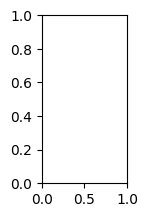

In [8]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [9]:
import tensorflow as tf
import tensorflow_hub as hub

url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [10]:
#Importante
#Congelar las capas
mobilenetv2.trainable = False

In [11]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

In [12]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
ruta = "jirafa.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

In [ ]:
ruta = "babuino.jpeg"
prediccion = categorizar(ruta)
print(prediccion)